ra = 211.91701  
dec	= 2.29671  
http://skyserver.sdss.org/dr15/en/tools/explore/summary.aspx?ra=211.917006&dec=2.296711  
Get the fits data from SDSS archives.

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy

The Equation for a Gaussian:

G(x) = $\frac{A}{\sigma\sqrt{2/pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$

A = Amplitude

$\sigma$ = Describes the width of the line  
x = Is the array of values of gaussian spans  
$\mu$ = The actual centre of our gaussian 


In [53]:
# Now, lets define the above function
def gauss(x,A,mu,sig):
    """
    Returns a Gaussian Profile
    
    """
    gaussian = A/(sig* np.sqrt(2/np.pi)) * np.exp(-(x-mu)**2/2*sig**2)
    return gaussian

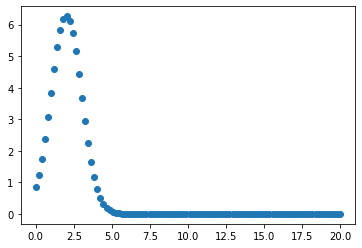

In [54]:
# let's test it once
x_t = np.linspace(0,20,100)
y_t = gauss(x_t ,5 , 2 , 1)

plt.scatter(x_t,y_t) #Cool

In [55]:
def non_linear_func_real(x_v, amp1,amp2,m1,m2,w1,cont): # cont will lift the curve in y coordinate
    """
    This Gaussian will combine Two Gaussian into one simulate model spectrum
    
    """
    
    return gauss(x_v,amp1,m1,w1) + gauss(x_v,amp2,m2,w1) + cont

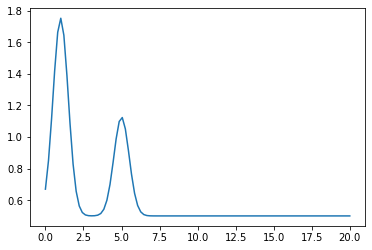

In [56]:
x_t2 = np.linspace(0,20,100)
y_t2 =non_linear_func_real(x_t2,1,2,5,1,2,0.5)
plt.plot(x_t2,y_t2)
plt.show()

In [57]:
def fit_data(wave,spec,amp1,amp2,m1,m2,w1,cont):
    """
    Fits to Gaussian profile of the specrumt to determine the
    amplitude ,line centers ,widths and continum of the input 
    spectrum.
    
    """
    print("=================================================")
    print("Performing A Least Squares fit......")
    
    popt, pcov = curve_fit(non_linear_func_real,wave,spec,p0 = [amp1,amp2,m1,m2,w1,cont])
    errs = np.sqrt(np.diag(pcov))
    print('=================================================')
    print('Printing Out The Best Fitting Parameters and 1 std errors......')
    print('=-------------------------------------------------')
    
    print('line 1 Amp:' + str(popt[0])+' Amp_err: ' +str(errs[0])+'\n')
    print('line 2 Amp:' + str(popt[1])+' Amp_err: ' +str(errs[1])+'\n')
    print('line 1 Wavelength:' + str(popt[2])+' Mean4959_err: ' +str(errs[2])+'\n')
    print('line 2 Wavelength:' + str(popt[3])+' Mean4959_err: ' +str(errs[3])+'\n')
    print('line width:' + str(popt[4])+' sigma_err: ' +str(errs[4])+'\n')
    print('Continuum Level:' + str(popt[5])+' Cont_err: ' +str(errs[5])+'\n')
    
    print('=================================================')
    print('Ploting the observed and modeled data....')
    y_m = non_linear_func_real(wave, *popt)
    plt.plot(wave,spec, label='data')
    plt.plot(wave,y_m, label='Model')
    plt.vlines(popt[2],ymin=0,ymax = spec.max(),linestyle='--',alpha=0.7, linewidth=0.7)
    plt.vlines(popt[3],ymin=0,ymax = spec.max(),linestyle='--',alpha=0.7, linewidth=0.7)
    
    
    plt.legend()
    plt.show()
    
    return popt , pcov

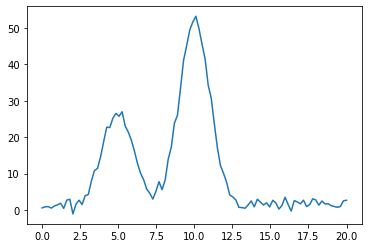

In [58]:
# Let's Fit our Model
wave_t = np.linspace(0,20,100)
pure_model = non_linear_func_real(wave_t,10,20,5,10,1,0.75)
func_t = pure_model + np.random.normal(loc=pure_model,size=len(pure_model))
plt.plot(wave_t,func_t)
plt.show()

Performing A Least Squares fit......
Printing Out The Best Fitting Parameters and 1 std errors......
=-------------------------------------------------
line 1 Amp:20.363656597958514 Amp_err: 0.3737007174347283

line 2 Amp:40.35907517588964 Amp_err: 0.5781629810092228

line 1 Wavelength:4.969498718940318 Mean4959_err: 0.018883015313682215

line 2 Wavelength:10.017161527005635 Mean4959_err: 0.009520464308577576

line width:1.002909851012629 sigma_err: 0.009315846971492958

Continuum Level:1.5133488654779592 Cont_err: 0.1410061070847561

Ploting the observed and modeled data....


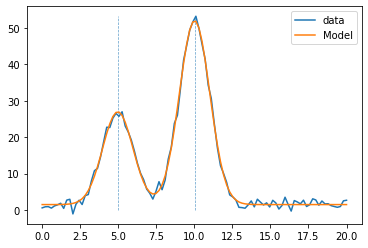

In [59]:
out_popt, out_pcov = fit_data(wave_t,func_t, 27,52,5,10.3,1.5,0.5)

z = $\frac{\lambda_o/\lambda_e}{\lambda_e}$

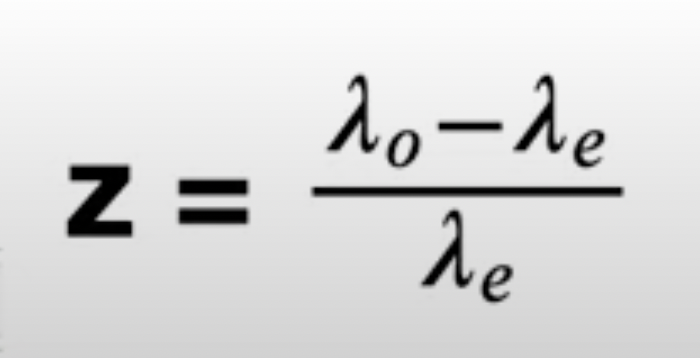

In [60]:
# z = Redshift
def redshift(lamo,lame):
    """
    It gives the redshift of the given light source
    observed at a rest frame wavelength
    """
    return (lamo-lame)/lame

In [61]:
z = redshift(6000,5688)
print("Redshift of the source:",z)

Redshift of the source: 0.05485232067510549


In [62]:
from astropy.io import fits

In [63]:
hdul = fits.open('/opt/anaconda3/lib/python3.8/site-packages/numkit/Virtual_Studio_Astronomy/spec-0532-51993-0497.fits')

In [64]:
print(hdul[1].columns)

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'and_mask'; format = 'J'
    name = 'or_mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'model'; format = 'E'
)


In [65]:
# Here,we are interested in Flux and Wavelength(loglam), lets define them
spec = hdul[1].data['flux']
waves = 10**hdul[1].data['loglam']  # in order to compensate for log

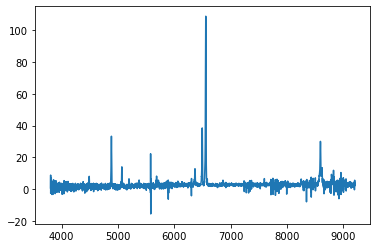

In [66]:
# now, lets plot the spectrum
plt.plot(waves,spec)
plt.show()

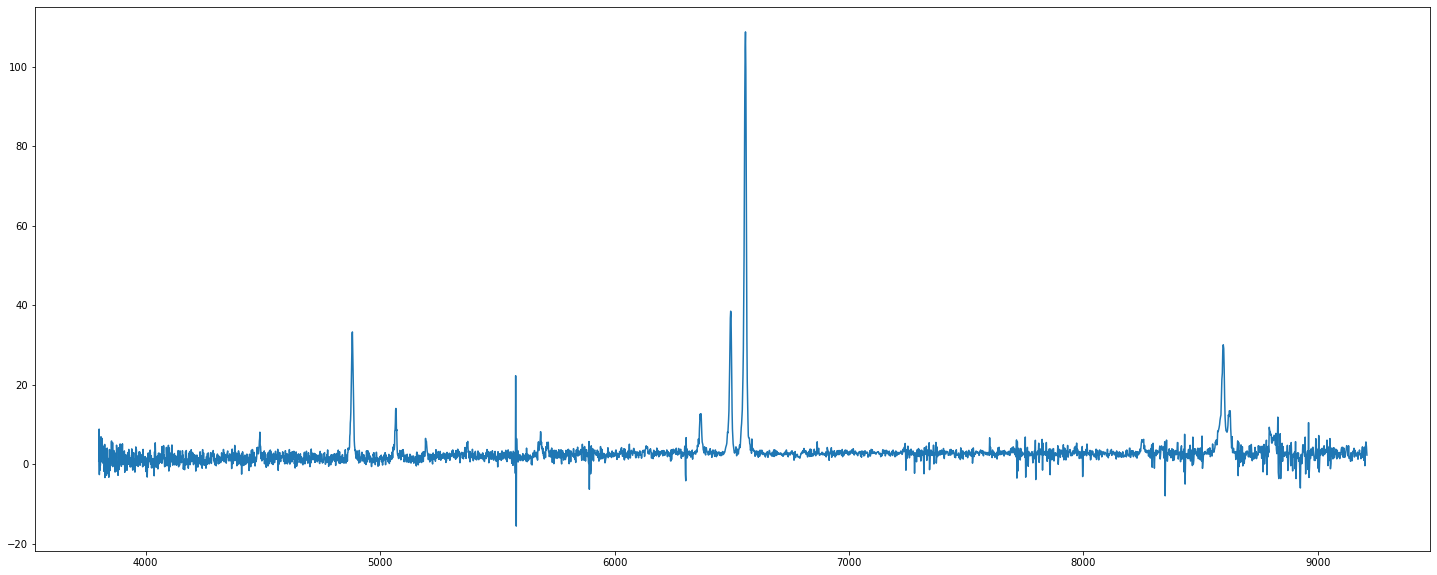

In [67]:
fig = plt.figure()
fig.set_size_inches(25,10)
plt.plot(waves,spec)
plt.show()
# Now , it is easier to analyse through eyes.

__Corresponding graph shows the element__  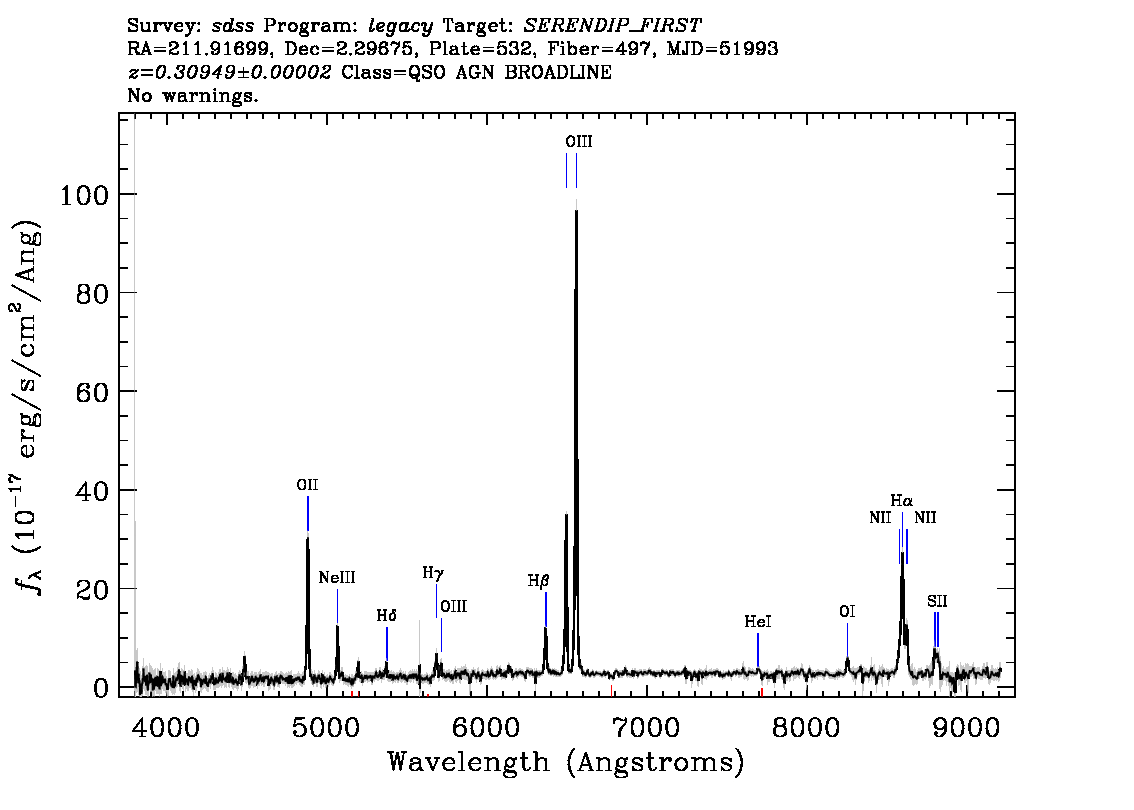

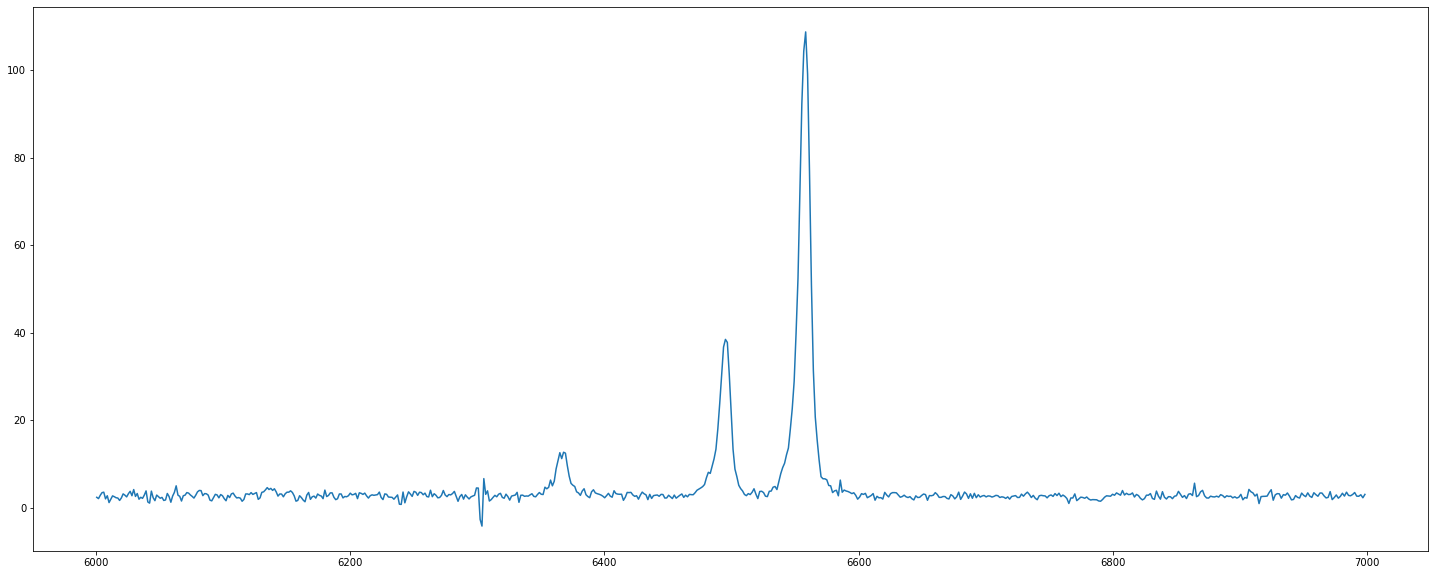

In [68]:
# Let's take out a specific part of specrum
sub_i = np.where((waves>6000) & (waves<7000))
sub_spec = spec[sub_i]
sub_wave = waves[sub_i]

fig = plt.figure()
fig.set_size_inches(25,10)
plt.plot(sub_wave,sub_spec)
plt.show()
# Wavelengt from 6000-7000

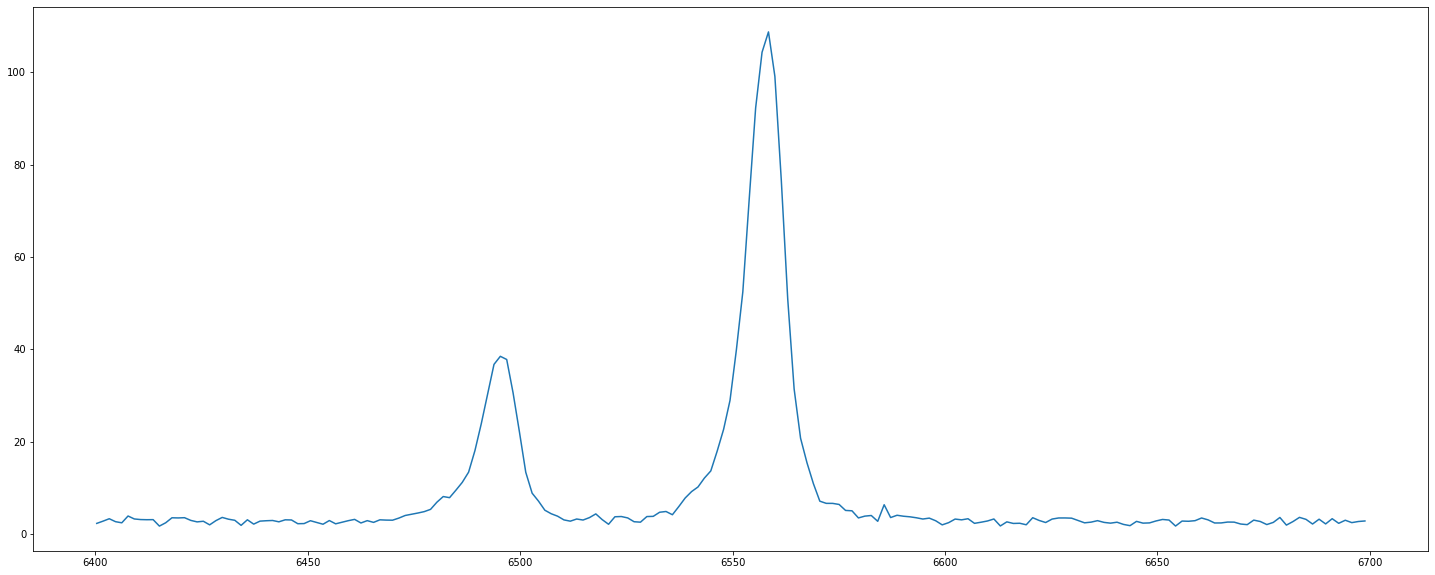

In [69]:
# As we have defined our fitting function with two gaussians, hence we are going to zoom in a little bit
sub_i = np.where((waves>6400) & (waves<6700))
sub_spec = spec[sub_i]
sub_wave = waves[sub_i]

fig = plt.figure()
fig.set_size_inches(25,10)
plt.plot(sub_wave,sub_spec)
plt.show()
# This looks Cool NOW....

In [71]:
import scipy.signal

In [73]:
spec_peaks = scipy.signal.find_peaks(sub_spec,height = 35)[0]
print(sub_wave[spec_peaks])

[6495.31   6558.4336]


Performing A Least Squares fit......
Printing Out The Best Fitting Parameters and 1 std errors......
=-------------------------------------------------
line 1 Amp:5.823373793610791 Amp_err: 0.1821558080812179

line 2 Amp:17.593176618460106 Amp_err: 0.34201525456623044

line 1 Wavelength:6494.940596353643 Mean4959_err: 0.16955358057494924

line 2 Wavelength:6557.593711021027 Mean4959_err: 0.05639043706974189

line width:0.216031976572056 sigma_err: 0.0025610100760658423

Continuum Level:3.4708585772218368 Cont_err: 0.15790386276353677

Ploting the observed and modeled data....


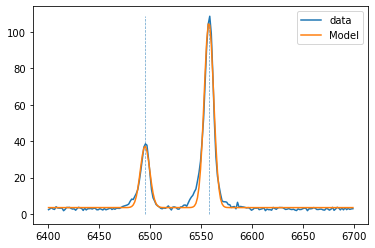

In [76]:
# Let's fit our Model
popt_,pcov_ = fit_data(sub_wave,sub_spec,40,128,*sub_wave[spec_peaks],5,4)

In [83]:
O3_4959_e = 4958.911
O3_5007_e = 5006.843

src_redshift1 = redshift(popt_[2],O3_4959_e)
print(src_redshift1)

src_redshift1 = redshift(popt_[2],O3_5007_e)
print(src_redshift1)

0.30975139427863146
0.29721275389574686
